# Case study on Supervised learning


1. Read the dataset to the python environment.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn import preprocessing

In [3]:
data=pd.read_excel('iris (2).xls')

In [4]:
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
data.shape

(150, 5)

insight:150 rows,5 columns

In [6]:
data.tail()##list out the last 5 rows of the dataset

,SL,SW,PL,PW,Classification
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


# 2. Do necessary pre-processing steps.


In [7]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


insight:we have here 5 features(columns)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
data.shape

(150, 5)

In [10]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#Identify missing values


In [11]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

insight:here we have 3 null values of numerical type.

In [12]:
data.dtypes 

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

In [13]:
data[['Classification']]

,Classification
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


In [14]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [16]:
x=data.drop(['Classification'],axis=1)

In [17]:
x

,SL,SW,PL,PW
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,NaN,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,NaN,2.0
148,6.2,3.4,5.4,2.3


#Filling missing values

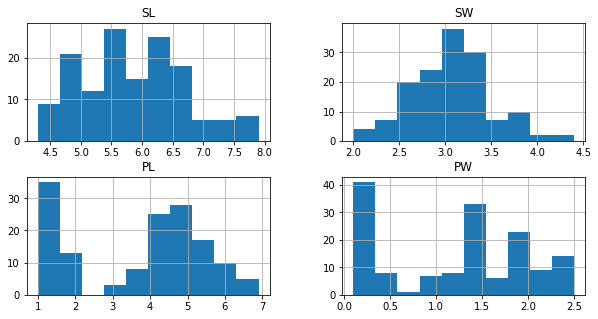

In [18]:
freqgraph =data.select_dtypes(include=['float'])
freqgraph.hist(figsize=(10,5))
plt.show()

In [23]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [24]:
data['SL']= data['SL'].fillna(data['SL'].median())

In [25]:
data.isna().sum()

SL                0
SW                6
PL                6
PW                0
Classification    0
dtype: int64

insight:here 1 of the null value SL is now filled .so the rest 2 null values can be filled by using another code using loop.

In [26]:
for i in {'SW','PL'}:
    data[i] =data[i].fillna(data[i].median())

In [27]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

insight:Now all null values are filled

#Handling Outliers

Text(0.5, 1.0, 'Box plot of SL')

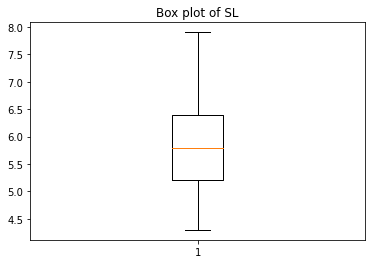

In [28]:
plt.boxplot(data['SL'])
plt.title('Box plot of SL')

Text(0.5, 1.0, 'Box plot of SW')

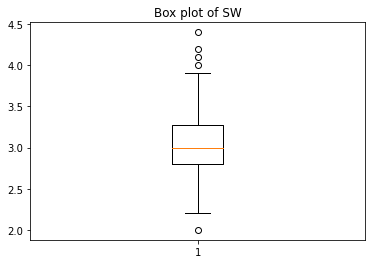

In [29]:
plt.boxplot(data['SW'])
plt.title('Box plot of SW')

Text(0.5, 1.0, 'Box plot of PL')

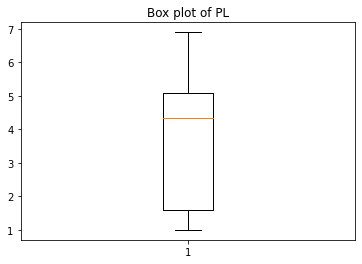

In [30]:
plt.boxplot(data['PL'])
plt.title('Box plot of PL')

Text(0.5, 1.0, 'Box plot of PW')

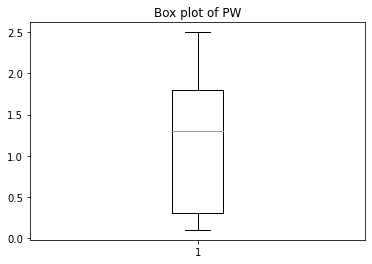

In [31]:
plt.boxplot(data['PW'])
plt.title('Box plot of PW')

In [32]:
Q1=np.percentile(data['SW'],25,interpolation='midpoint')
Q2=np.percentile(data['SW'],50,interpolation='midpoint')
Q3=np.percentile(data['SW'],75,interpolation='midpoint')

In [33]:
print(Q1,Q2,Q3)

2.8 3.0 3.25


In [34]:
data['SW'].median()

3.0

In [35]:
IQR=Q3-Q1

In [36]:
low_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
print(low_limit)
print(upper_limit)

2.1249999999999996
3.9250000000000003


In [37]:
outlier=[]
for x in data['SW']:
    if (x>upper_limit) or (x<low_limit):
        outlier.append(x)

In [38]:
outlier

[4.0, 4.4, 4.1, 4.2, 2.0]

In [39]:
ind1=data['SW']>upper_limit
data.loc[ind1].index

Int64Index([14, 15, 32, 33], dtype='int64')

In [40]:
data.drop([14, 15, 32, 33],inplace=True)

Text(0.5, 1.0, 'Box plot of SW')

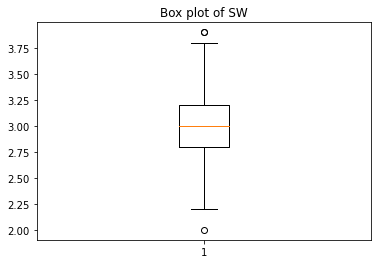

In [41]:
plt.boxplot(data['SW'])
plt.title('Box plot of SW')

#one hot encoding

In [42]:
data.Classification.nunique()

3

In [43]:
data=pd.get_dummies(data)

In [44]:
data.head()

,SL,SW,PL,PW,Classification_Iris-setosa,Classification_Iris-versicolor,Classification_Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,5.8,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


#LINEAR REGRESSION MODEL

In [45]:
corrmatrix=data.corr()

<AxesSubplot:>

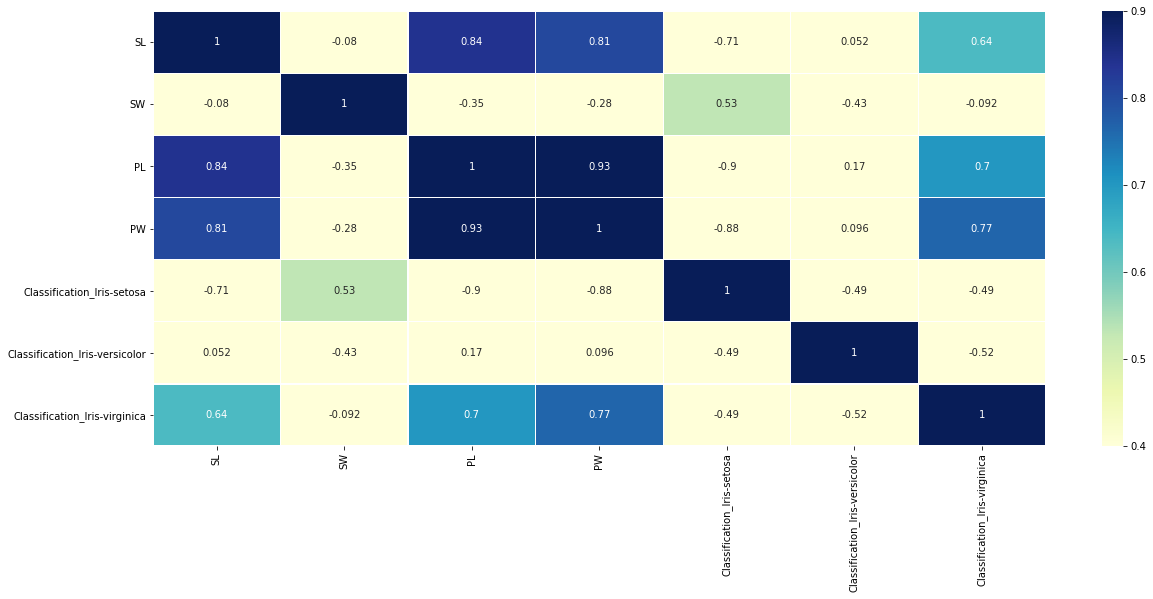

In [46]:
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,vmin=0.4,vmax=0.9,annot=True,linewidth=0.2,cmap='YlGnBu')

# 3. Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)

In [47]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification_Iris-setosa',
       'Classification_Iris-versicolor', 'Classification_Iris-virginica'],
      dtype='object')

In [48]:
data.shape

(146, 7)

#Building the model

In [82]:
y= data['PW']
X= data.drop('PW',axis =1)

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,

test_size=0.33, random_state=42)

In [51]:
from sklearn import linear_model
lr=linear_model.LinearRegression()
model =lr.fit(X_train,y_train)

In [52]:
predictions=model.predict(X_test)

In [53]:
from sklearn.metrics import mean_squared_error

In [54]:
print('MSE is:',mean_squared_error(y_test,predictions))

MSE is: 0.026979031937479355


In [55]:
from sklearn.metrics import r2_score
print('R squared value is:',r2_score(y_test,predictions))

R squared value is: 0.9606182633679337


#Random forest Model

In [59]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [61]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.13687074829931967
Mean Squared Error: 0.03038469387755101
Root Mean Squared Error: 0.17431205889883525


In [69]:
X_train.shape

(97, 6)

In [70]:
y_train.shape

(97,)

In [72]:
X_test.shape

(49, 6)

In [74]:
y_test.shape

(49,)

insight:from this above model,random forest model is the best.